## Roteiro: baixando a malha viária
Neste notebook narramos o caminho completo: configurar o ambiente, buscar a malha do entorno do aeroporto O'Hare e deixá-la salva para uso no GraphHopper. Pense como uma trilha guiada de dados: a cada etapa garantimos que o próximo passo está pronto.

In [12]:
import osmnx as ox

from pathlib import Path

### 1) Preparar as ferramentas
Importamos o `osmnx` para conversar com o OpenStreetMap e o `Path` para manter os caminhos organizados. É a mochila básica antes de sair para o passeio de coleta.

In [13]:
ox.settings.all_oneway = True

### 2) Tratar sentidos das vias
Ajustamos `ox.settings.all_oneway = True` para que as ruas de mão única sejam respeitadas no grafo. Isso evita atalhos irreais quando formos fazer o matching.

In [14]:
ROOT_PATH = Path(".").resolve().absolute()
DATA_PATH = ROOT_PATH / "data"
NETWORKS_PATH = ROOT_PATH / "networks"
PLACE_NAME = "O'Hare, Chicago, Illinois, USA"

### 3) Definir onde salvar e qual recorte baixar
Criamos as pastas-base (`data/` e `networks/`) e escolhemos o recorte: `O'Hare, Chicago, Illinois, USA`. Esse nome será enviado à API do OSM.

In [15]:
G = ox.graph_from_place(
    PLACE_NAME,
    network_type="drive",
    simplify=False,
    retain_all=False,
)
G

### 4) Baixar o grafo viário
Chamamos `ox.graph_from_place` com `network_type="drive"` para obter apenas vias dirigíveis. Mantemos `simplify=False` para preservar os detalhes brutos, úteis em validação.

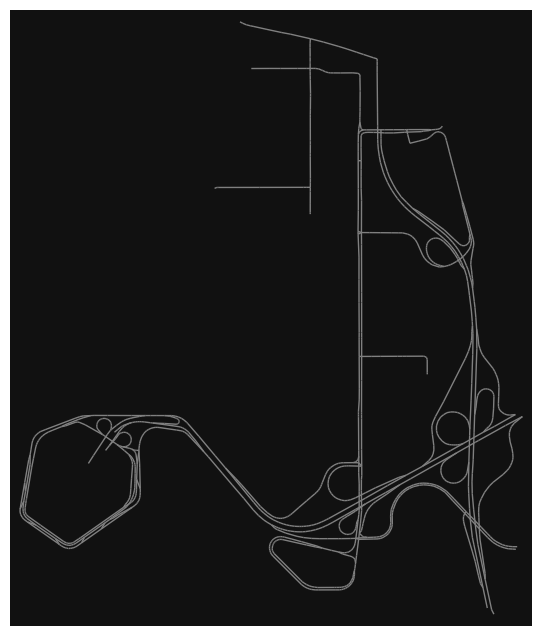

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
ox.plot_graph(G, node_size=0, edge_color="gray")

### 5) Conferir visualmente
Um plot rápido ajuda a garantir que o recorte veio correto e sem distorções antes de salvar.

In [17]:
NETWORKS_PATH.mkdir(parents=True, exist_ok=True)
ox.save_graph_xml(G, NETWORKS_PATH / "ohare_network.osm.xml")

### 6) Persistir para uso posterior
Garantimos que a pasta existe e salvamos em XML (`ohare_network.osm.xml`). Esse arquivo é o que o GraphHopper consome no script de importação.